In [ ]:
'''
Implement the CNN model for classifying CIFAR10 image dataset by dividing the     
model into following 4 stages: 
a. Loading and preprocessing the image data 
b. Defining the model's architecture 
c. Training the model 
d. Estimating the model's performance
'''

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Reproducibility
tf.keras.utils.set_random_seed(42)
np.random.seed(42)

In [9]:
# Load CIFAR
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [10]:
y_train = y_train.flatten()
y_test = y_test.flatten()

# Scale pixels to [0,1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

print("Train: ", x_train.shape, y_train.shape)
print("Test: ", x_test.shape, y_test.shape)

Train:  (50000, 32, 32, 3) (50000,)
Test:  (10000, 32, 32, 3) (10000,)


In [14]:
# CNN
model = keras.Sequential([
    layers.Input(shape=(32,32,3)),
    
    layers.Conv2D(32, 3, activation="relu", padding="same"),
    layers.Conv2D(32, 3, activation="relu", padding="same"),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    
    layers.Conv2D(64, 3, activation="relu", padding="same"),
    layers.Conv2D(64, 3, activation="relu", padding="same"),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    
    layers.Flatten(),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,048,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,116,970 (4.26 MB)

 Trainable params: 1,116,970 (4.26 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Compile 
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    x_train, y_train,
    validation_split=0.1,
    epochs=20,
    batch_size=128,
    verbose=2
)

Epoch 1/20
352/352 - 53s - 150ms/step - accuracy: 0.3976 - loss: 1.6445 - val_accuracy: 0.5694 - val_loss: 1.2120
Epoch 2/20
352/352 - 53s - 151ms/step - accuracy: 0.5599 - loss: 1.2259 - val_accuracy: 0.6490 - val_loss: 0.9952
Epoch 3/20
352/352 - 55s - 156ms/step - accuracy: 0.6296 - loss: 1.0457 - val_accuracy: 0.6944 - val_loss: 0.8760
Epoch 4/20
352/352 - 57s - 161ms/step - accuracy: 0.6684 - loss: 0.9363 - val_accuracy: 0.7178 - val_loss: 0.8100
Epoch 5/20
352/352 - 58s - 164ms/step - accuracy: 0.6995 - loss: 0.8509 - val_accuracy: 0.7458 - val_loss: 0.7382
Epoch 6/20
352/352 - 58s - 166ms/step - accuracy: 0.7202 - loss: 0.7988 - val_accuracy: 0.7464 - val_loss: 0.7343
Epoch 7/20
352/352 - 60s - 171ms/step - accuracy: 0.7380 - loss: 0.7427 - val_accuracy: 0.7604 - val_loss: 0.6915
Epoch 8/20
352/352 - 59s - 167ms/step - accuracy: 0.7519 - loss: 0.7065 - val_accuracy: 0.7750 - val_loss: 0.6719
Epoch 9/20
352/352 - 61s - 174ms/step - accuracy: 0.7643 - loss: 0.6729 - val_accuracy: 

In [16]:
# Evaluate model on unseen set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test loss:{test_loss:.4f} | Test accuracy:{test_acc:.4f}")

Test loss:0.6514 | Test accuracy:0.7879


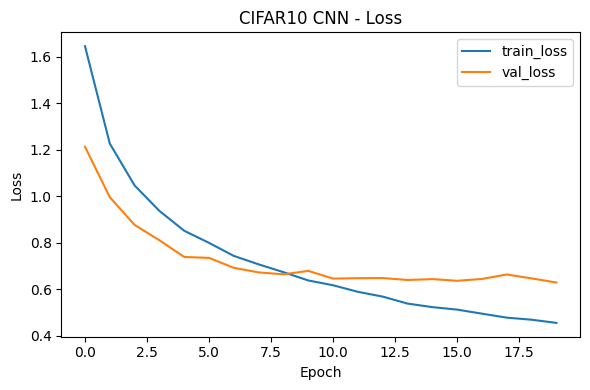

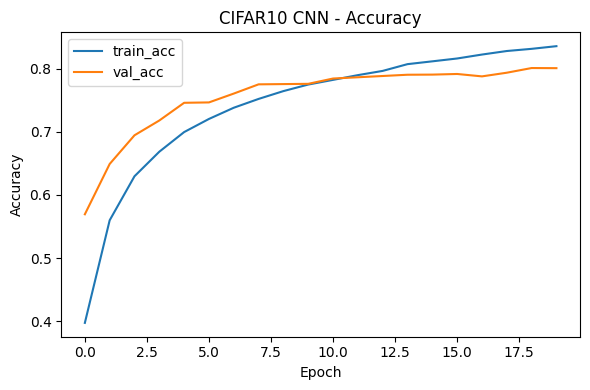

In [17]:
# Plot Training Vs Validation Loss
plt.figure(figsize=(6,4))
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("CIFAR10 CNN - Loss")
plt.legend()
plt.tight_layout()
plt.show()

# Plot Training Vs Validation Accuracy
plt.figure(figsize=(6,4))
plt.plot(history.history["accuracy"], label="train_acc")
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("CIFAR10 CNN - Accuracy")
plt.legend()
plt.tight_layout()
plt.show()